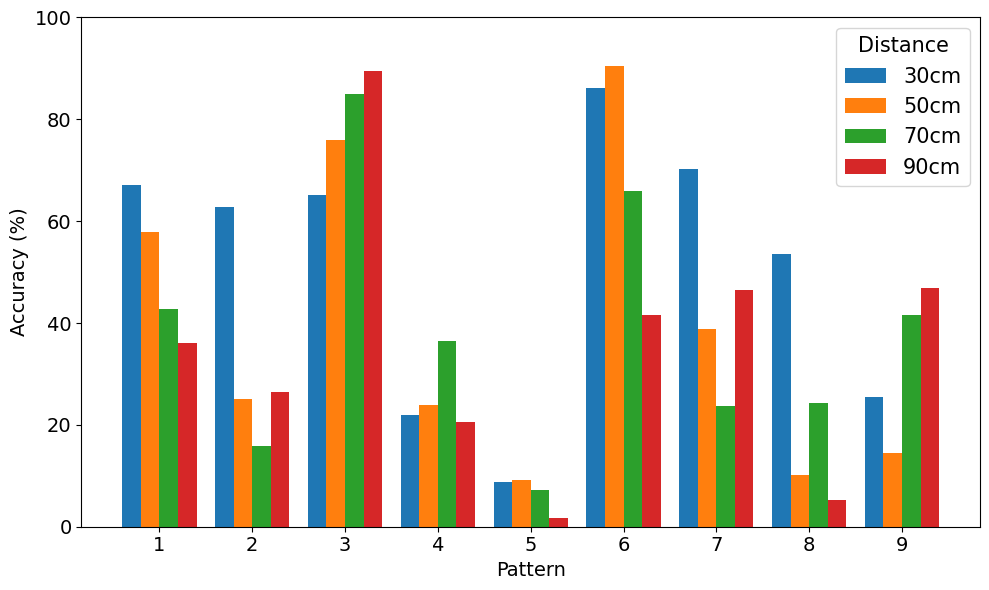

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define filenames and distances
files = {
    '30cm': 'detection_log_D30_Lmb.csv',
    '50cm': 'detection_log_D50_Lmb.csv',
    '70cm': 'detection_log_D70_Lmb.csv',
    '90cm': 'detection_log_D90_Lmb.csv'
}

bar_width = 0.2
pattern_ids = list(range(1, 10))
x = np.arange(len(pattern_ids))

plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)  # Ensure '01', '02' format
    df['Pattern'] = df['Pattern'].astype(int)               # Convert to integer 1–9
    values = df.set_index('Pattern').loc[pattern_ids]['Accuracy (%)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.show()

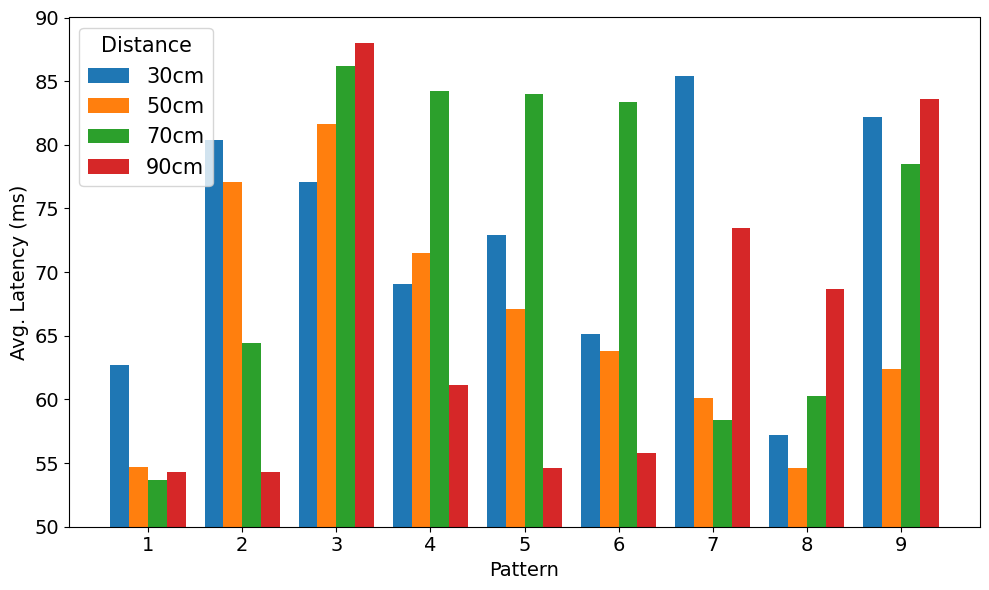

In [14]:
plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)
    df['Pattern'] = df['Pattern'].astype(int)
    values = df.set_index('Pattern').loc[pattern_ids]['Avg Latency (ms)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Avg. Latency (ms)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(50, 90)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.show()

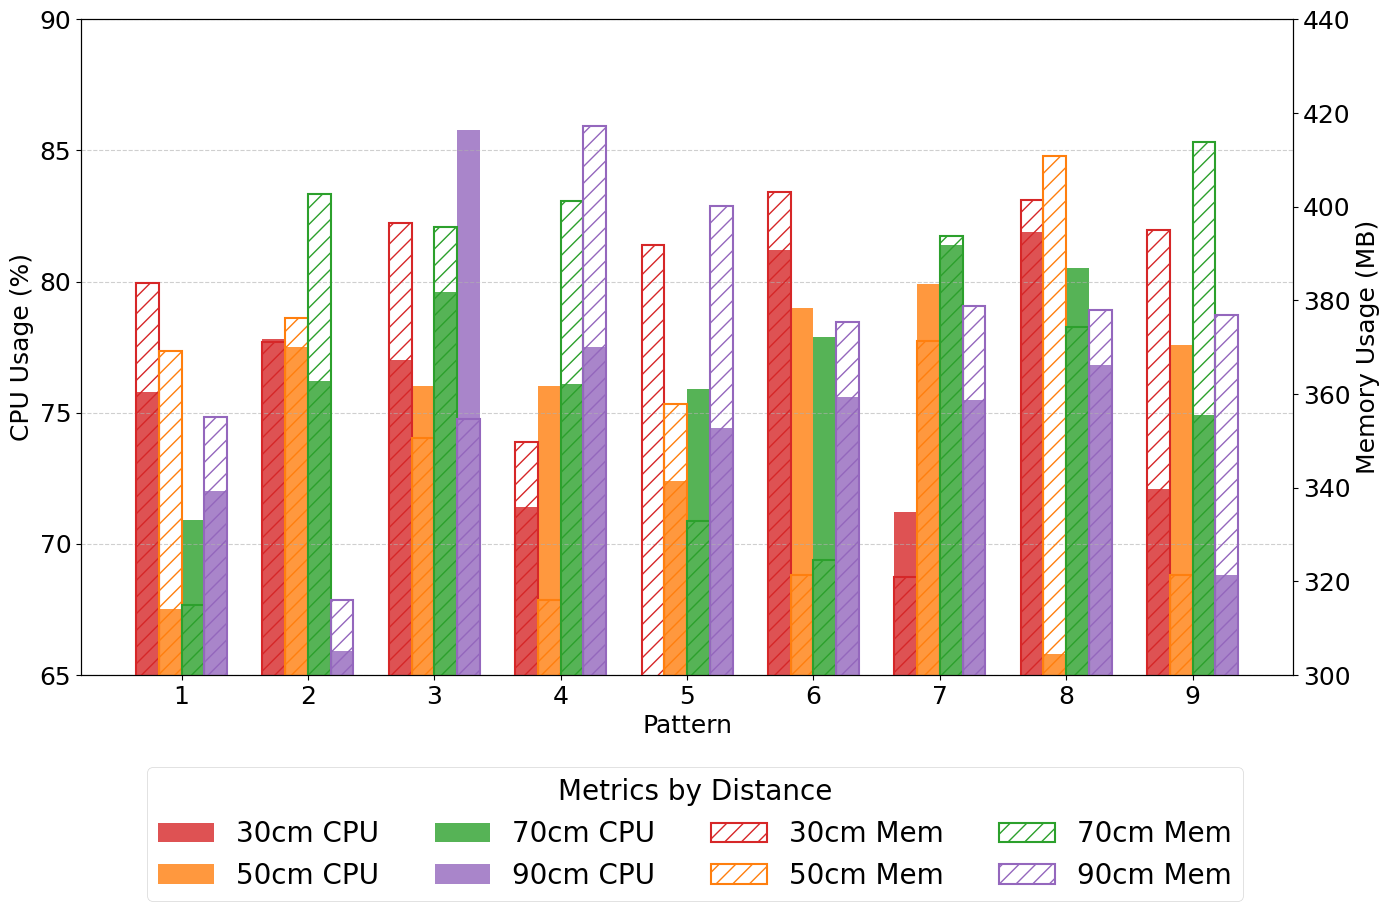

In [21]:
# Pattern indices
patterns = list(range(1, 10))
x = np.arange(len(patterns))
bar_w = 0.18

# Colors/hatching
cpu_colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd']
mem_hatches = ['//','//','//','//']

# Font sizes
LABEL_SIZE = 18
TICK_SIZE  = 18
LEGEND_SIZE = 20
LEGEND_TITLE = 20

# 2) Create figure
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# 3) Plot bars
for i, (label, path) in enumerate(files.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2).astype(int)
    df.set_index('Pattern', inplace=True)
    cpu_vals = df.loc[patterns]['Avg CPU (%)']
    mem_vals = df.loc[patterns]['Avg Memory (MB)']
    offset = (i - 1.5) * bar_w

    # CPU
    ax1.bar(x + offset, cpu_vals, width=bar_w,
            color=cpu_colors[i], alpha=0.8,
            label=f'{label} CPU')
    # Memory
    ax2.bar(x + offset, mem_vals, width=bar_w,
            fill=False, edgecolor=cpu_colors[i],
            hatch=mem_hatches[i], linewidth=1.5,
            label=f'{label} Mem')

# 4) Labels & ticks
ax1.set_xlabel('Pattern', fontsize=LABEL_SIZE)
ax1.set_ylabel('CPU Usage (%)', fontsize=LABEL_SIZE)
ax2.set_ylabel('Memory Usage (MB)', fontsize=LABEL_SIZE)

ax1.set_xticks(x)
ax1.set_xticklabels(patterns, fontsize=TICK_SIZE)
ax1.set_yticks(np.arange(65, 91, 5))
ax1.tick_params(axis='y', labelsize=TICK_SIZE)
ax2.tick_params(axis='y', labelsize=TICK_SIZE)

ax1.set_ylim(65, 90)
ax2.set_ylim(300, 440)

ax1.grid(axis='y', linestyle='--', alpha=0.6)

# 5) Legend below
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles, labels = h1 + h2, l1 + l2

legend = fig.legend(handles, labels,
                    loc='lower center',
                    bbox_to_anchor=(0.5, -0.15),
                    ncol=4,
                    fontsize=LEGEND_SIZE,
                    title='Metrics by Distance',
                    title_fontsize=LEGEND_TITLE)
legend.get_frame().set_linewidth(0.5)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()